In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [3]:
base_model=InceptionV3(input_shape=(224,224,3),include_top=False)

In [4]:
for layer in base_model.layers:
    layer.trainable=False

In [5]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

#Final Model
model=Model(base_model.input,X)

#compile the model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

Pre process data using Data Generator

In [8]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                                rotation_range=0.4,
                                width_shift_range=0.3,
                                horizontal_flip=True,
                                preprocessing_function=preprocess_input,
                                zoom_range=0,
                                shear_range=0.4)

train_data=train_datagen.flow_from_directory(target_size=(224,224),
                                             directory="C:/Users/Acer/ALL/Original",
                                             batch_size=64)

Found 1308 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'infected': 0, 'normal': 1}

visualizing the data

In [10]:
t_img, label=train_data.next()

C:\Users\Acer\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [11]:
t_img.shape

(64, 224, 224, 3)

In [12]:
def plotImages(img_arr,label):
    for idx, img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


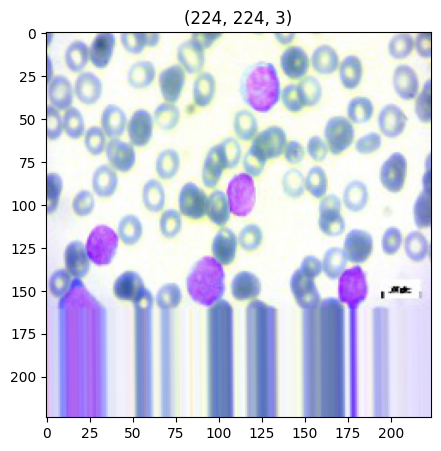

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


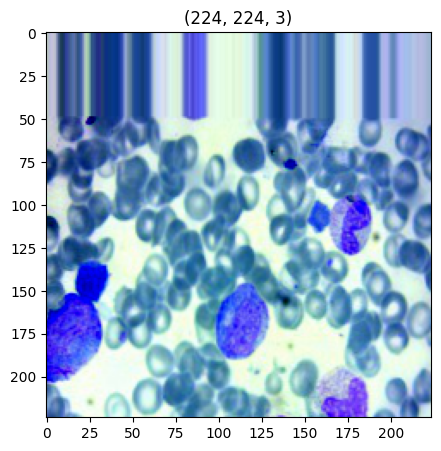

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


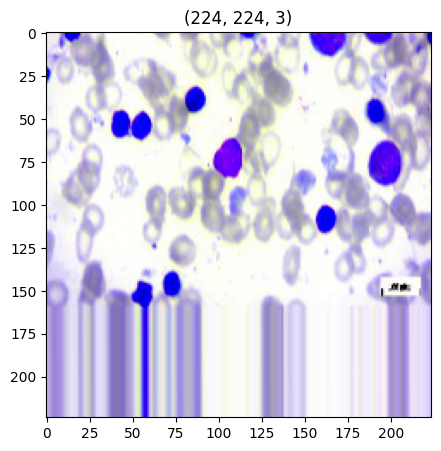

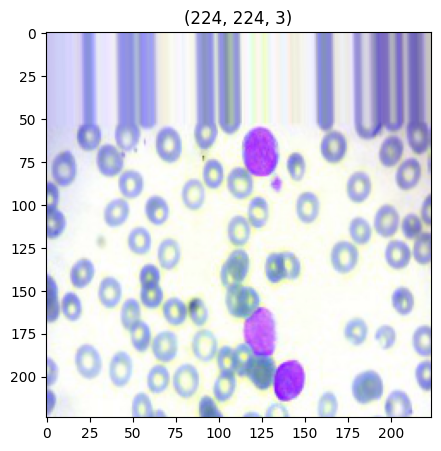

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


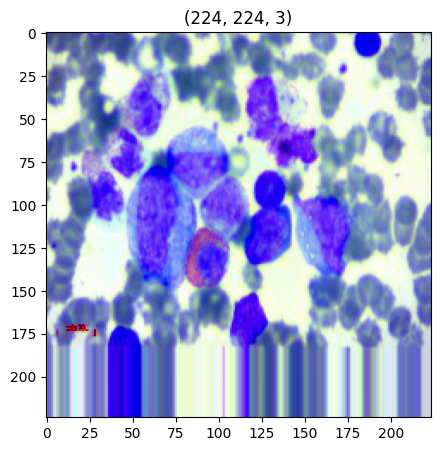

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


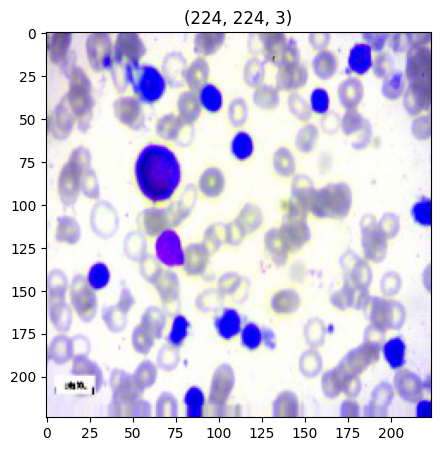

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


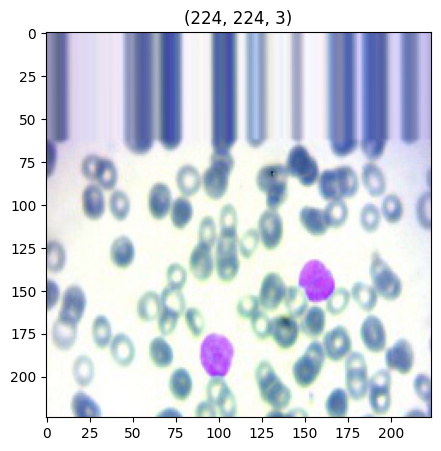

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


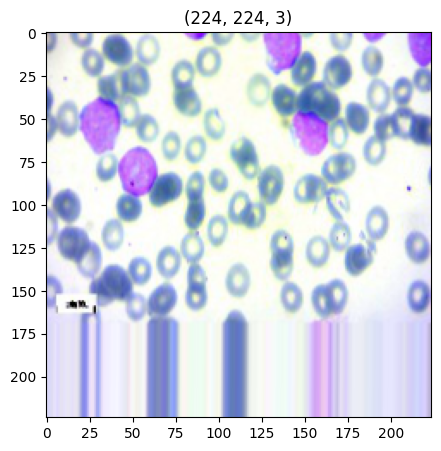

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


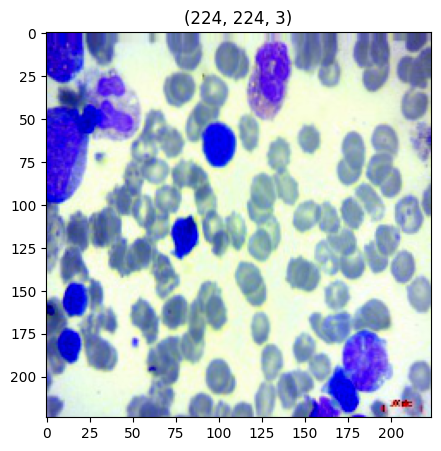

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


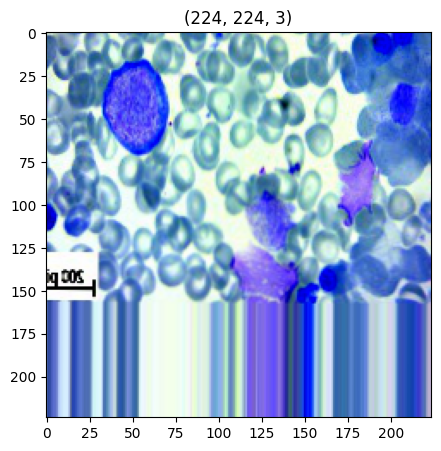

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


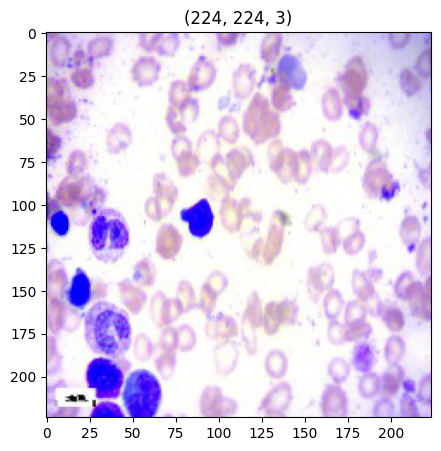

In [13]:
plotImages(t_img,label)

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc=ModelCheckpoint(filepath="C:/Users/Acer/best_model.h5",
                  monitor="accuracy",
                  verbose=1,
                  save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                min_delta=0.01,
                patience=5,
                verbose=1)

cb=[mc,es]

In [66]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=10,
                        callbacks=cb)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10996\953480879.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train_data,


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 1.6730 - accuracy: 0.6781
Epoch 1: accuracy improved from -inf to 0.67813, saving model to C:/Users/Acer\best_model.h5
10/10 [==============================] - 15s 1s/step - loss: 1.6730 - accuracy: 0.6781
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9288
Epoch 2: accuracy improved from 0.67813 to 0.92881, saving model to C:/Users/Acer\best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.2867 - accuracy: 0.9288
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9516
Epoch 3: accuracy improved from 0.92881 to 0.95156, saving model to C:/Users/Acer\best_model.h5
10/10 [==============================] - 12s 1s/step - loss: 0.1433 - accuracy: 0.9516
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9750
Epoch 4: accuracy improved from 0.95156 to 0.97500, saving model to C:/Users/A

In [15]:
from keras.models import load_model

model=load_model("C:/Users/Acer/best_model.h5")

In [16]:
h=his.history
h.keys()

NameError: name 'his' is not defined

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'],c="red")

plt.title("Loss vs Acc")

validate our model

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The person is normal


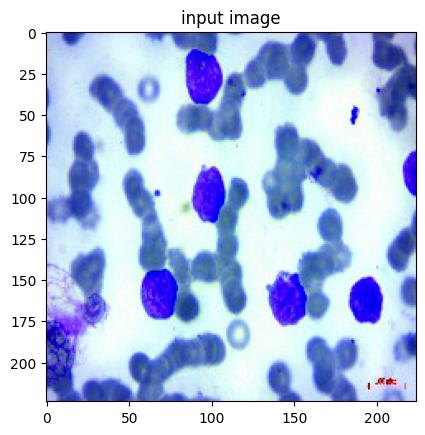

In [17]:
#path for image to see if it predicts correct class

path='D:/New folder/Early/WBC-Malignant-Early-001.jpg'
img=load_img(path,target_size=(224,224))

i=img_to_array(img)

i=preprocess_input(i)

input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
    print("The person is infected")
else:
    print("The person is normal")
    
#to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis=False
plt.show()